In [1]:
import numpy as np
import tensorflow as tf
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
#import keras
from tensorflow.keras.utils import to_categorical
#from keras import losses
from tensorflow.keras.optimizers import Adagrad
#form keras import metrics
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#form keras.optimizers import SGD
#from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [3]:
dirname = os.path.join(os.getcwd(), 'sportimages')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\TIGRE15JHAC\Desktop\UIDE\ACADEMICO\modulo 2 Tratamiento de Información\clase 3\Guion de la prueba final.html\venv\Scripts\sportimages\
C:\Users\TIGRE15JHAC\Desktop\UIDE\ACADEMICO\modulo 2 Tratamiento de Información\clase 3\Guion de la prueba final.html\venv\Scripts\sportimages\americano 1
C:\Users\TIGRE15JHAC\Desktop\UIDE\ACADEMICO\modulo 2 Tratamiento de Información\clase 3\Guion de la prueba final.html\venv\Scripts\sportimages\basket 9348
C:\Users\TIGRE15JHAC\Desktop\UIDE\ACADEMICO\modulo 2 Tratamiento de Información\clase 3\Guion de la prueba final.html\venv\Scripts\sportimages\beisball 8823
C:\Users\TIGRE15JHAC\Desktop\UIDE\ACADEMICO\modulo 2 Tratamiento de Información\clase 3\Guion de la prueba final.html\venv\Scripts\sportimages\boxeo 7752
C:\Users\TIGRE15JHAC\Desktop\UIDE\ACADEMICO\modulo 2 Tratamiento de Información\clase 3\Guion de la prueba final.html\venv\Scripts\sportimages\ciclismo 7125
C:\Users\TIGRE15JHAC\Desktop\UIDE\ACADEMICO\modulo 2 Trat

In [4]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  77128


In [5]:
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 americano
1 basket
2 beisball
3 boxeo
4 ciclismo
5 f1
6 futbol
7 golf
8 natacion
9 tenis


In [6]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [7]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (61702, 21, 28, 3) (61702,)
Testing data shape :  (15426, 21, 28, 3) (15426,)


Text(0.5, 1.0, 'Ground Truth : 4')

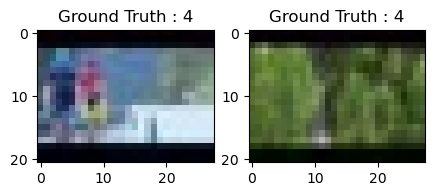

In [8]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [9]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [10]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 4
After conversion to one-hot: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [11]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [12]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(49361, 21, 28, 3) (12341, 21, 28, 3) (49361, 10) (12341, 10)


In [13]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 6 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [14]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))

sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

In [15]:
sport_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 28, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 21, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4928)              0         
                                                                 
 dense (Dense)               (None, 32)                157728    
                                                        

In [16]:
#opt= keras.optimizers.Adam(learning_rate=0.01)
opt= keras.optimizers.Adagrad(lr=INIT_LR, decay=INIT_LR / 100) 

sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer = opt, metrics=['Accuracy'])         

C:\Users\TIGRE15JHAC\anaconda3\lib\site-packages\keras\optimizer_v2\adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


In [17]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
# como ejemplo, en mi Macbook pro tarda 4 minutos
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_split=0.2)

Epoch 1/6
772/772 [==============================] - 8s 9ms/step - loss: 2.0932 - Accuracy: 0.2454 - val_loss: 1.7547 - val_Accuracy: 0.6041
Epoch 2/6
772/772 [==============================] - 7s 10ms/step - loss: 1.7613 - Accuracy: 0.3996 - val_loss: 1.4540 - val_Accuracy: 0.6363
Epoch 3/6
772/772 [==============================] - 8s 11ms/step - loss: 1.5742 - Accuracy: 0.4677 - val_loss: 1.2707 - val_Accuracy: 0.6798
Epoch 4/6
772/772 [==============================] - 7s 9ms/step - loss: 1.4511 - Accuracy: 0.5151 - val_loss: 1.1509 - val_Accuracy: 0.7107
Epoch 5/6
772/772 [==============================] - 7s 9ms/step - loss: 1.3568 - Accuracy: 0.5495 - val_loss: 1.0627 - val_Accuracy: 0.7390
Epoch 6/6
772/772 [==============================] - 7s 9ms/step - loss: 1.2897 - Accuracy: 0.5729 - val_loss: 0.9950 - val_Accuracy: 0.7643
Epoch 1/6
617/617 [==============================] - 6s 10ms/step - loss: 1.2394 - Accuracy: 0.5911 - val_loss: 0.9673 - val_Accuracy: 0.7763
Epoch 2/6


In [18]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

483/483 [==============================] - 1s 2ms/step - loss: 0.8113 - Accuracy: 0.8173


In [19]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.8112882971763611
Test accuracy: 0.8173214197158813


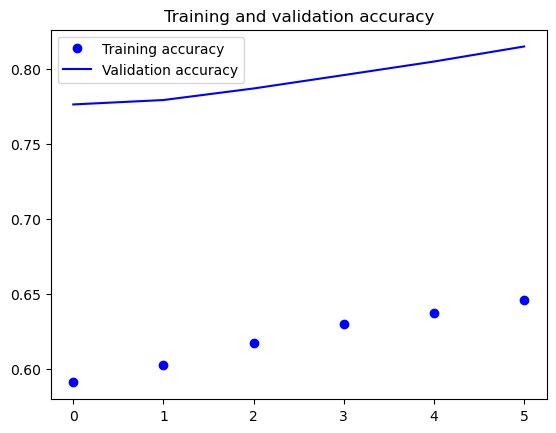

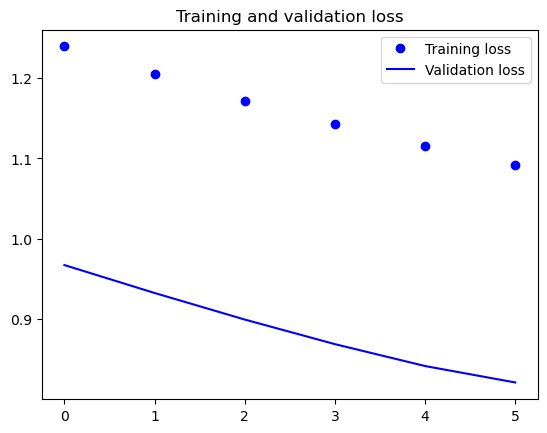

In [20]:
accuracy = sport_train.history['Accuracy']
val_accuracy = sport_train.history['val_Accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [21]:
predicted_classes2 = sport_model.predict(test_X)

In [22]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [23]:
predicted_classes.shape, test_Y.shape

((15426,), (15426,))

Found 12608 correct labels


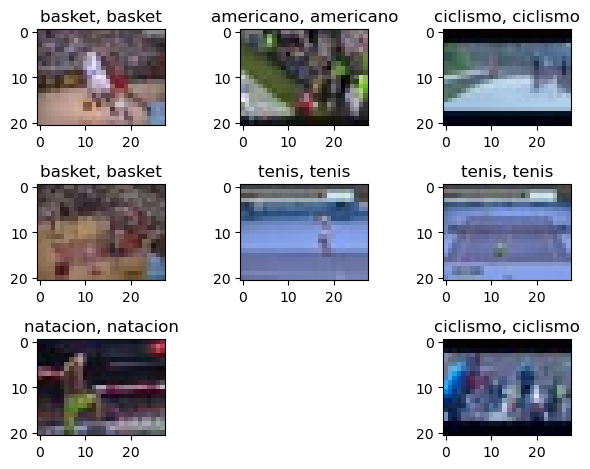

In [24]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

Found 2818 incorrect labels


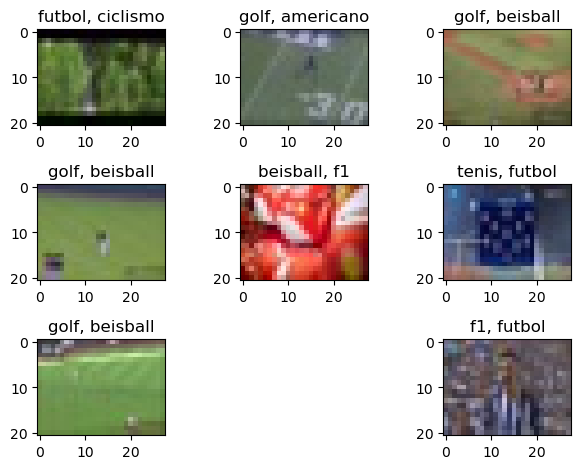

In [25]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [26]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.70      0.56      0.62      1847
     Class 1       0.81      0.87      0.84      1734
     Class 2       0.78      0.77      0.77      1547
     Class 3       0.86      0.93      0.89      1446
     Class 4       0.95      0.98      0.96      1536
     Class 5       0.76      0.41      0.53      1023
     Class 6       0.94      0.77      0.84      1537
     Class 7       0.64      0.89      0.74      1941
     Class 8       0.93      0.92      0.92      1013
     Class 9       0.93      1.00      0.96      1802

    accuracy                           0.82     15426
   macro avg       0.83      0.81      0.81     15426
weighted avg       0.82      0.82      0.81     15426



In [27]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['test/beisball_0002.jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (21, 28),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = sport_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], deportes[img_tagged.tolist().index(max(img_tagged))])

test/beisball_0002.jpg beisball


In [28]:
print (predicted_classes)

[[0.13098726 0.22363627 0.22521451 0.1377752  0.01695825 0.05137148
  0.03880832 0.09314414 0.0229069  0.05919761]]
